# Decision tree assignment

In [68]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

In [4]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [7]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin','E mbarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [25]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [27]:
titanic = titanic.dropna()

In [28]:
X = titanic.iloc[:,1:]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [29]:
y = titanic.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
X.Sex = pd.get_dummies(titanic.Sex).iloc[:,0]

In [31]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [34]:
clf = DecisionTreeClassifier(random_state=0)

In [35]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.72916667, 0.72916667, 0.64583333, 0.72916667, 0.66666667,
       0.75      , 0.875     , 0.75      , 0.76595745, 0.74468085])

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [39]:
clf.score(X_test,y_test)

0.7584745762711864

[Text(452.830078125, 527.6117647058824, 'X[1] <= 0.5\ngini = 0.481\nsamples = 478\nvalue = [286, 192]'),
 Text(169.22204945388347, 495.63529411764705, 'X[2] <= 13.0\ngini = 0.32\nsamples = 300\nvalue = [240, 60]'),
 Text(44.69417475728155, 463.6588235294118, 'X[3] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(36.567961165048544, 431.6823529411765, 'X[4] <= 0.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(28.441747572815533, 399.7058823529412, 'X[2] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(20.315533980582522, 367.7294117647059, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(36.567961165048544, 367.7294117647059, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(44.69417475728155, 399.7058823529412, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(52.82038834951456, 431.6823529411765, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(293.7499241504854, 463.6588235294118, 'X[0] <= 1.5\ngini = 0.278\nsamples = 276\nvalue = [230, 46]'),
 Text(

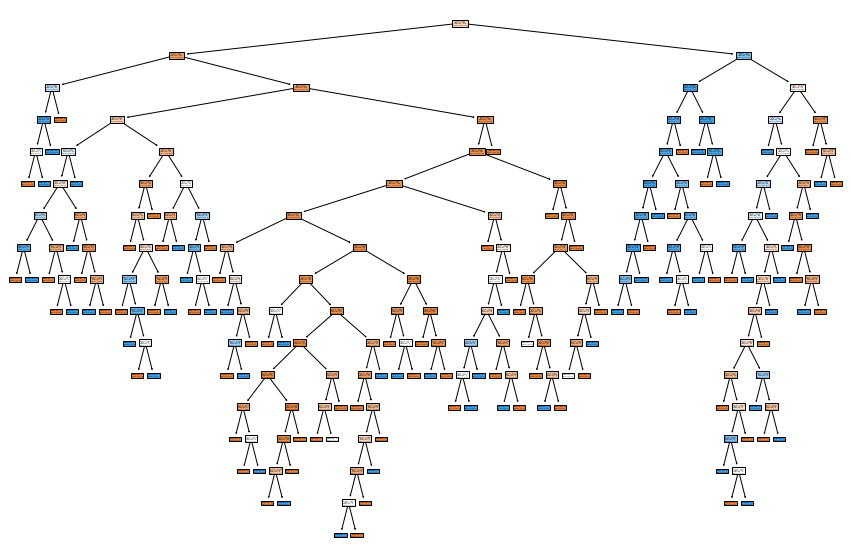

In [43]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [45]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [48]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
clfs

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0005230125523012553),
 DecisionTreeClassifier(ccp_alpha=0.0010460251046025106),
 DecisionTreeClassifier(ccp_alpha=0.0011585009223017047),
 DecisionTreeClassifier(ccp_alpha=0.0012226267456392989),
 DecisionTreeClassifier(ccp_alpha=0.0013693419551160139),
 DecisionTreeClassifier(ccp_alpha=0.001394700139470014),
 DecisionTreeClassifier(ccp_alpha=0.0015690376569037646),
 DecisionTreeClassifier(ccp_alpha=0.0015690376569037657),
 DecisionTreeClassifier(ccp_alpha=0.0015690376569037657),
 DecisionTreeClassifier(ccp_alpha=0.0016736401673640164),
 DecisionTreeClassifier(ccp_alpha=0.0016736401673640164),
 DecisionTreeClassifier(ccp_alpha=0.001708507670850767),
 DecisionTreeClassifier(ccp_alpha=0.0017116774438950173),
 DecisionTreeClassifier(ccp_alpha=0.0017433751743375174),
 DecisionTreeClassifier(ccp_alpha=0.0017829973373906438),
 DecisionTreeClassifier(ccp_alpha=0.0018305439330543933),
 DecisionTreeClassifier(ccp_alpha=0.00193112327

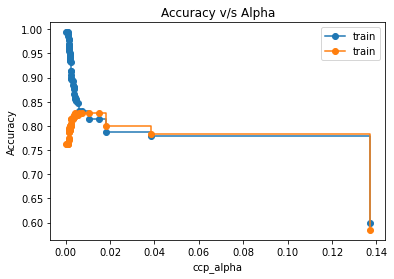

In [49]:
train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy v/s Alpha')
ax.plot(ccp_alphas,train_scores, marker='o',label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores, marker='o',label='train',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [51]:
#ccp_alphas[np.where(ccp_alphas>0.01 and ccp_alphas<0.02)]
np.where(np.logical_and(ccp_alphas>0.01,ccp_alphas<0.02))

(array([43, 44, 45], dtype=int64),)

In [53]:
ccp_alphas[np.where(np.logical_and(ccp_alphas>0.01,ccp_alphas<0.02))]

array([0.01034229, 0.01513118, 0.01827057])

In [61]:
clf1 = DecisionTreeClassifier(ccp_alpha=0.01034229)
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.826271186440678

[Text(453.375, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.481\nsamples = 478\nvalue = [286, 192]'),
 Text(279.0, 339.75, 'X[2] <= 13.0\ngini = 0.32\nsamples = 300\nvalue = [240, 60]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(69.75, 67.94999999999999, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(418.5, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.278\nsamples = 276\nvalue = [230, 46]'),
 Text(348.75, 67.94999999999999, 'gini = 0.469\nsamples = 64\nvalue = [40, 24]'),
 Text(488.25, 67.94999999999999, 'gini = 0.186\nsamples = 212\nvalue = [190, 22]'),
 Text(627.75, 339.75, 'X[0] <= 2.5\ngini = 0.383\nsamples = 178\nvalue = [46, 132]'),
 Text(558.0, 203.85000000000002, 'gini = 0.126\nsamples = 104\nvalue = [7, 97]'),
 Text(697.5, 203.85000000000002, 'X[5] <= 20.167\ngini = 0.499\nsamples = 74\nvalue = [39, 35]'),
 Text(627.75, 67.94999999999999, '

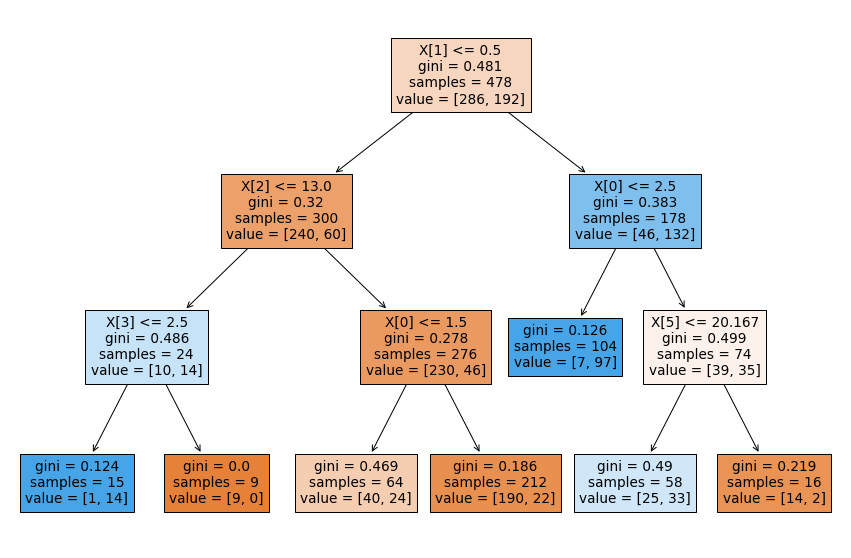

In [62]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf1,filled=True)

In [66]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       138
           1       0.86      0.69      0.77        98

    accuracy                           0.83       236
   macro avg       0.83      0.81      0.81       236
weighted avg       0.83      0.83      0.82       236



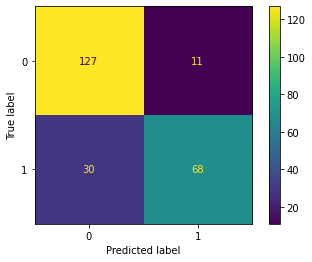

In [74]:
plot_confusion_matrix(clf1,X_test,y_test)

In [63]:
clf2 = DecisionTreeClassifier(ccp_alpha=0.01513118)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.826271186440678

[Text(494.5909090909091, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.481\nsamples = 478\nvalue = [286, 192]'),
 Text(304.3636363636364, 339.75, 'X[2] <= 13.0\ngini = 0.32\nsamples = 300\nvalue = [240, 60]'),
 Text(152.1818181818182, 203.85000000000002, 'X[3] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(76.0909090909091, 67.94999999999999, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(228.27272727272728, 67.94999999999999, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(456.54545454545456, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.278\nsamples = 276\nvalue = [230, 46]'),
 Text(380.4545454545455, 67.94999999999999, 'gini = 0.469\nsamples = 64\nvalue = [40, 24]'),
 Text(532.6363636363636, 67.94999999999999, 'gini = 0.186\nsamples = 212\nvalue = [190, 22]'),
 Text(684.8181818181819, 339.75, 'X[0] <= 2.5\ngini = 0.383\nsamples = 178\nvalue = [46, 132]'),
 Text(608.7272727272727, 203.85000000000002, 'gini = 0.126\nsamples = 104\nvalue = [7, 97]'),
 Text(760.9090909

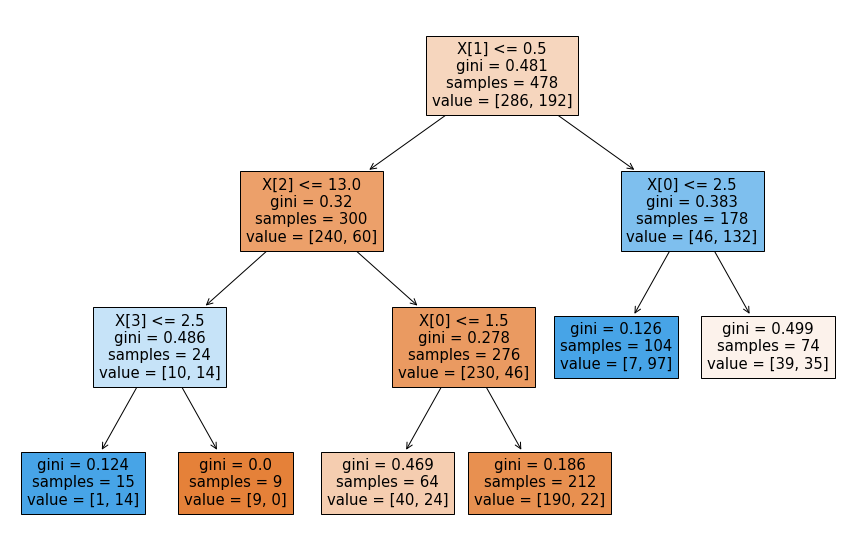

In [64]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)

In [67]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       138
           1       0.97      0.60      0.74        98

    accuracy                           0.83       236
   macro avg       0.87      0.79      0.81       236
weighted avg       0.86      0.83      0.82       236



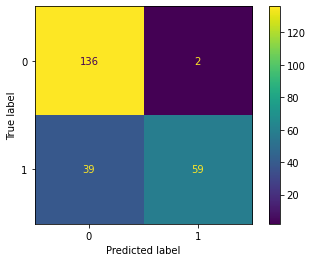

In [71]:
plot_confusion_matrix(clf2,X_test,y_test)